In [2]:
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
np.random.seed(0) #for reproducibility, making sure the same random numbers are initialized. 

In [4]:
#dogs: higher flappy index, lower whisker length 
dogs_whisker_length = np.random.normal(loc=5, scale = 1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale = 1, size=10)

In [5]:
dogs_whisker_length


array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [6]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [7]:
#cats: lower ear flappy, higher whisker length 
cats_whisker_length = np.random.normal(loc=8, scale = 1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale = 1, size=10)

<function matplotlib.pyplot.show(close=None, block=None)>

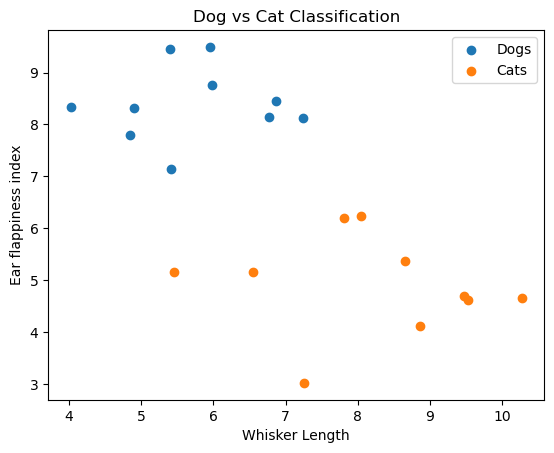

In [8]:
#plot the data points 
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs') 
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label ='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear flappiness index')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show



In [9]:
#implementing random linear classifier algorithm
def random_linear_classifier(data_dogs,data_cats,k,d):
    # d is the number of features 
    best_error = float('inf')
    best_theta = None
    best_theta0 = None 
    
    for _ in range (k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        
        error = compute_error(data_dogs,data_cats,theta,theta0)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    return best_theta, best_theta0        
        

In [10]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0: #hypothesis 
            error += 1
    for x_cat in data_cats:  
        if np.dot(theta, x_cat)+ theta0 > 0: #hypothesis
            error += 1
    return error             
    

In [11]:
# prepare data for algorithm, putting the data into x and y coordinates by stacking the dta together 
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T

In [12]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [13]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [14]:
# Run random linear classifier algorithm 
k = 100 #number of iteration 
d = 2 # number of features 
best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)

In [15]:
best_theta

array([-1.07075262,  1.05445173])

In [16]:
best_theta0

-0.40317694697317963

In [17]:
# plot the decision boundary
x_vals = np.linspace(2, 10, 100) 
y_vals = (-best_theta[0]/best_theta[1])* x_vals - (best_theta0 / best_theta[1])

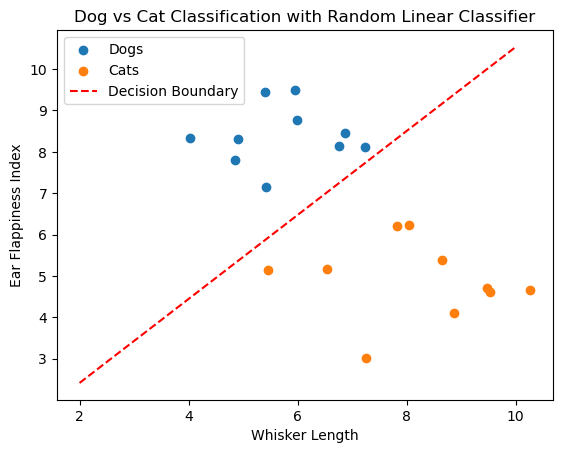

In [18]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label = 'Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label ='Cats')
plt.plot(x_vals, y_vals, color = 'red', linestyle ='--', label = 'Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()
